### Sales Data Analysis:

The following analysis has been performed using the sales_data.csv and steps provided within the Data Analysis with Python on freeCodeCamp:

https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-course/data-analysis-example-a

In [ ]:
# import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
"""Parse Dates: The parse_dates=['Date'] argument tells pandas to automatically convert the values in the Date column into datetime objects. 
This is useful for working with dates, as it allows you to perform operations like filtering by time ranges or extracting components such as year, month, or day."""

# change file path as required:
sales = pd.read_csv(r'Data_Analysis\Data\sales_data.csv', parse_dates=['Date'])

FileNotFoundError: [Errno 2] No such file or directory: 'Data_Analysis\\Data\\sales_data.csv'

In [ ]:
# review top 5 rows to assess data structure:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
# 113K rows by 18 columns:
sales.shape

(113036, 18)

In [ ]:
# sanity check the columns and data types are as expected:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [ ]:
# descriptive stats of all numeric fields:
sales.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014-11-23 12:14:55.063519232,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,2016-01-09 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000
std,NaN,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674


In [ ]:
# review descriptive stats on Unit_Cost field alone:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [9]:
sales['Unit_Cost'].mean()

267.296365759581

In [10]:
sales['Unit_Cost'].median()

9.0

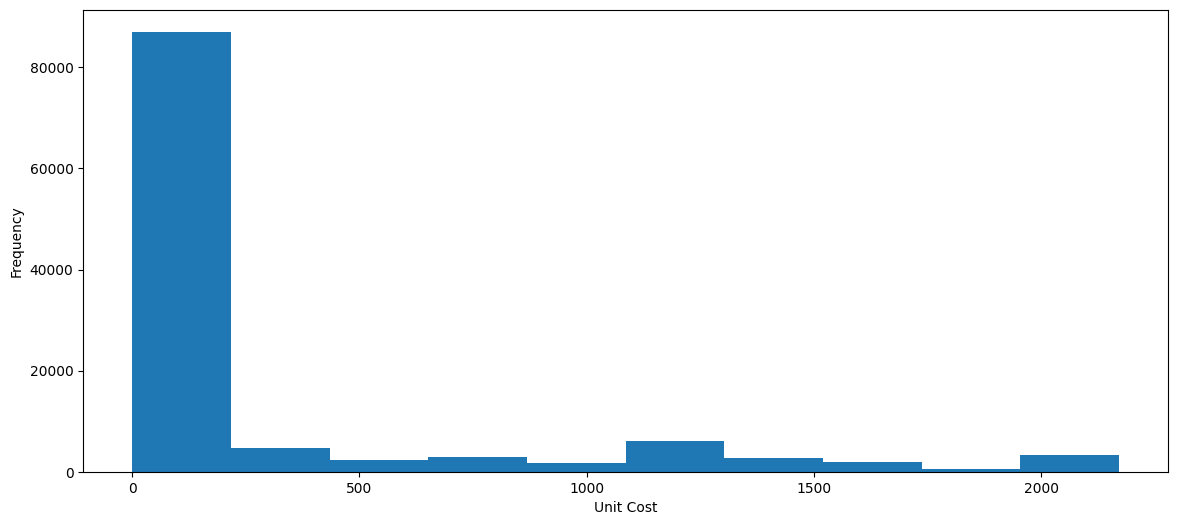

In [ ]:
# plot the distribution of the Unit_Cost column with a histogram:
sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))

# Add axis labels
plt.xlabel('Unit Cost')  # X-axis label
plt.ylabel('Frequency') # Y-axis label

# Show the plot
plt.show()

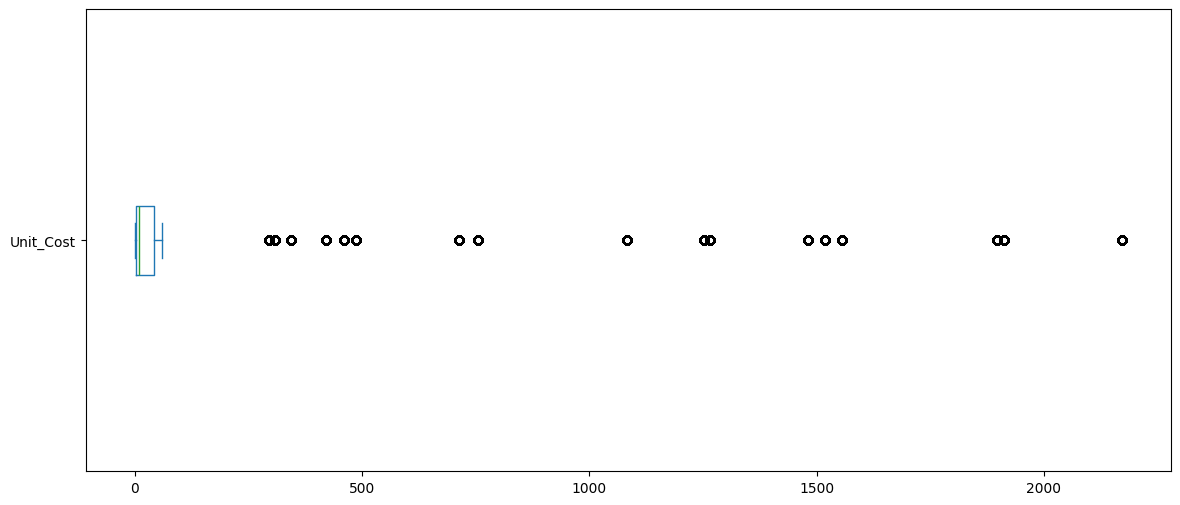

In [ ]:
# box plot displayed horizontally (vert=False):
sales['Unit_Cost'].plot(kind='box', vert=False,figsize=(14,6))

# Show the plot
plt.show()

In [6]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6))

# Set vertical lines for mean and median:
mean = sales['Unit_Cost'].mean()
median = sales['Unit_Cost'].median()
ax.axvline(mean, color='red', linestyle='--', label='Mean')
ax.axvline(median, color='green', linestyle='--', label='Median')

# Set axis labels:
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Unit Cost')

# Add a legend to clarify the lines:
ax.legend()

plt.show()

NameError: name 'sales' is not defined

In [15]:
sales['Age_Group'].value_counts()

Age_Group
Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: count, dtype: int64

<Axes: ylabel='count'>

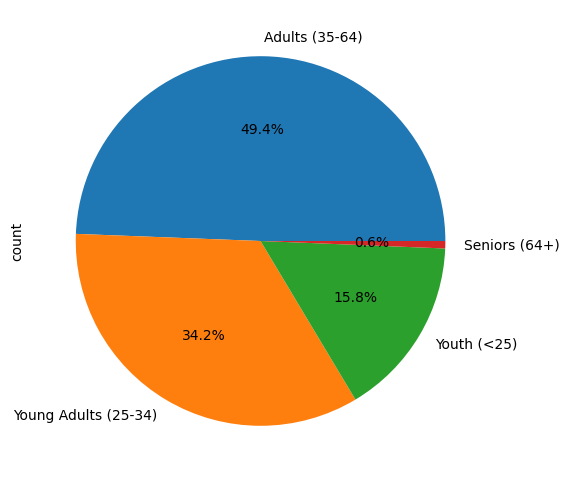

In [16]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6),  autopct='%1.1f%%')

In [14]:
sales['Product_Category'].value_counts()

Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: count, dtype: int64

<Axes: ylabel='count'>

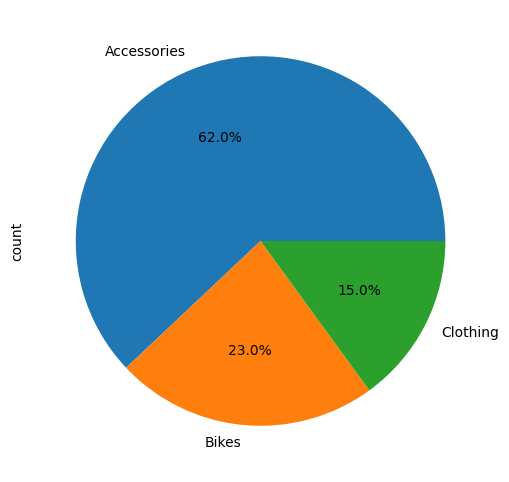

In [15]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6),  autopct='%1.1f%%')

In [16]:
sales['Product'].value_counts()

Product
Water Bottle - 30 oz.      10794
Patch Kit/8 Patches        10416
Mountain Tire Tube          6816
AWC Logo Cap                4358
Sport-100 Helmet, Red       4220
                           ...  
Mountain-100 Silver, 48       58
Mountain-100 Silver, 42       54
Mountain-500 Silver, 48       40
Road-650 Red, 52              32
Mountain-500 Black, 52        22
Name: count, Length: 130, dtype: int64

In [ ]:
# correlation matrix -1 negative, 0 none, 1 positive:
corr = sales.corr(numeric_only=True)

print(corr)

                     Day      Year  Customer_Age  Order_Quantity  Unit_Cost  \
Day             1.000000 -0.007635     -0.014296       -0.002412   0.003133   
Year           -0.007635  1.000000      0.040994        0.123169  -0.217575   
Customer_Age   -0.014296  0.040994      1.000000        0.026887  -0.021374   
Order_Quantity -0.002412  0.123169      0.026887        1.000000  -0.515835   
Unit_Cost       0.003133 -0.217575     -0.021374       -0.515835   1.000000   
Unit_Price      0.003207 -0.213673     -0.020262       -0.515925   0.997894   
Profit          0.004623 -0.181525      0.004319       -0.238863   0.741020   
Cost            0.003329 -0.215604     -0.016013       -0.340382   0.829869   
Revenue         0.003853 -0.208673     -0.009326       -0.312895   0.817865   

                Unit_Price    Profit      Cost   Revenue  
Day               0.003207  0.004623  0.003329  0.003853  
Year             -0.213673 -0.181525 -0.215604 -0.208673  
Customer_Age     -0.020262  0.00

([<matplotlib.axis.YTick at 0x21cad2c23f0>,
 [Text(0, 0, 'Day'),
  Text(0, 1, 'Year'),
  Text(0, 2, 'Customer_Age'),
  Text(0, 3, 'Order_Quantity'),
  Text(0, 4, 'Unit_Cost'),
  Text(0, 5, 'Unit_Price'),
  Text(0, 6, 'Profit'),
  Text(0, 7, 'Cost'),
  Text(0, 8, 'Revenue')])

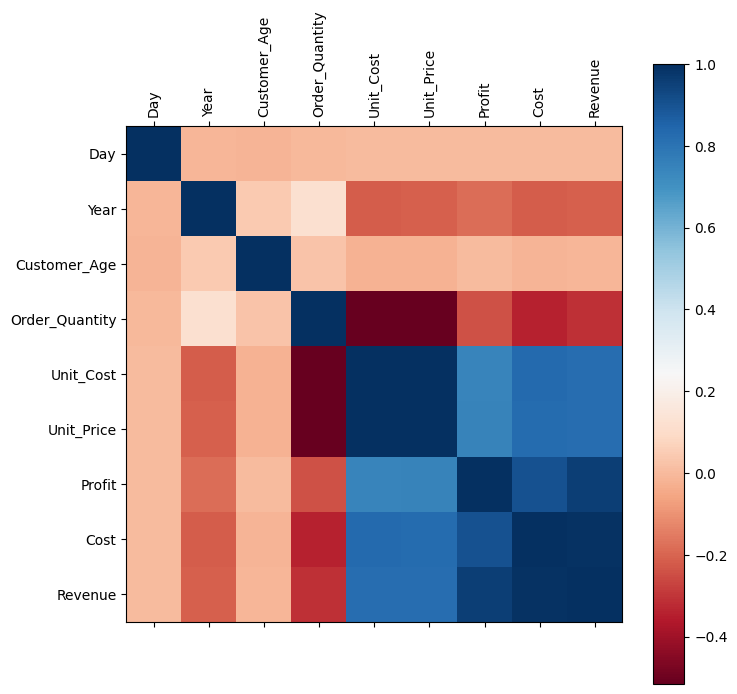

In [ ]:
# plot correlation matrix:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.colorbar()  # Adding a color legend
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns)

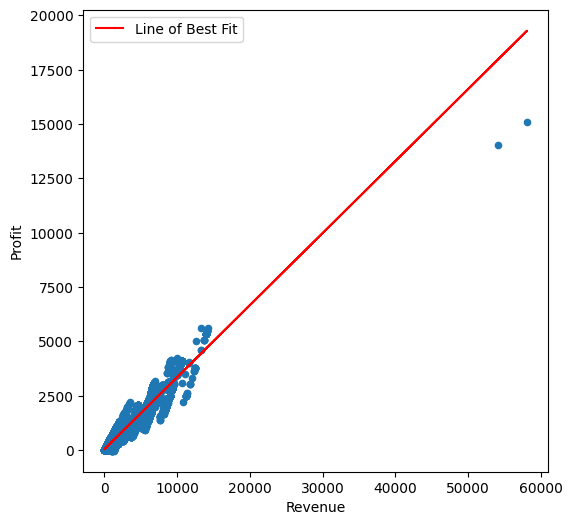

In [ ]:
# deep dive Revenue vs Profit using a scatterplot:

# Create scatterplot
ax = sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6, 6))

# Calculate the line of best fit
x = sales['Revenue']
y = sales['Profit']
m, b = np.polyfit(x, y, 1)  # m is the slope, b is the intercept

# Plot the line of best fit
plt.plot(x, m * x + b, color='red', label='Line of Best Fit')

# Add labels and legend
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.legend()

# Display the plot
plt.show()

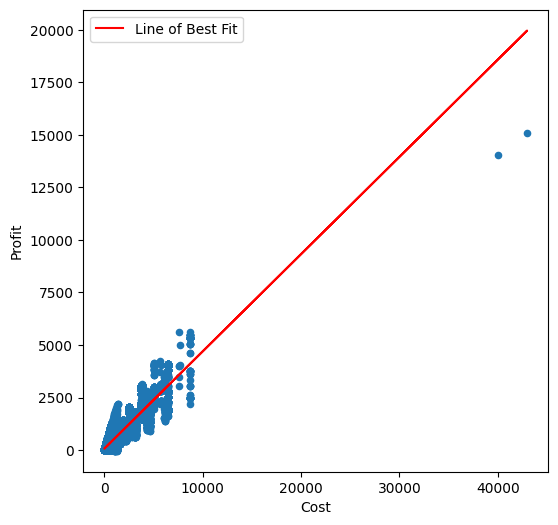

In [ ]:
# deep dive Cost vs Profit using a scatterplot:

# Create scatterplot
ax = sales.plot(kind='scatter', x='Cost', y='Profit', figsize=(6, 6))

# Calculate the line of best fit
x = sales['Cost']
y = sales['Profit']
m, b = np.polyfit(x, y, 1)  # m is the slope, b is the intercept

# Plot the line of best fit
plt.plot(x, m * x + b, color='red', label='Line of Best Fit')

# Add labels and legend
plt.xlabel('Cost')
plt.ylabel('Profit')
plt.legend()

# Display the plot
plt.show()